# MECAPLAB GPT

- Análise de Dados do Mercado Financeiro sem precisar Programar
- Fale em português para gerar o código python, veja o resultado e execute logo em seguida.

In [ ]:
#@title Setup Inicial (somente no colab)
# Rodar no colab
!pip install openai
!pip install yfinance
!pip install vectorbt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 9.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4

In [ ]:
#@title Setup Inicial
import openai
# os.environ["OPENAI_API_KEY"] = "YOUR KEY"

# Load your API key from an environment variable or secret management service
# openai.api_key = os.getenv("OPENAI_API_KEY")
my_key = "YOUR KEY"
openai.api_key = my_key

# Definir funções

In [ ]:
def gerar_codigo(pedido):
  prompt_inicial = """
  I want you to act as a python developer that understand portugueese.

  I will ask you something and you will reply with the most intuitive solution in python code.

  I want you to only reply with python code, and nothing else.

  I want you show the code with comments in portugueese if the request is in portugueese.

  If the last output is a plot or data frame, I want you show me all the labels (x, y, rows, columns,...) in the same language of the request.

  Use only the library numpy, pandas, matplotlib, yfinance.

  My first request is:\n
  """
  prompt_final = prompt_inicial + pedido

  resposta = openai.Completion.create(
    model="text-davinci-003",
    prompt=prompt_final,
    temperature=0,
    max_tokens=64*10,
    top_p=1.0,
    frequency_penalty=0.0,
    presence_penalty=0.0
  )

  return(resposta)

def mostrar_codigo(resposta_gpt):
  code = resposta_gpt['choices'][0]['text']
  print("="*25,"inicio do código gerado", "="*25, "\n")
  print(code)
  print("\n","="*25,"final do código gerado", "="*25)

def executar_codigo(resposta_gpt):
  code = resposta_gpt['choices'][0]['text']
  exec(code)
  # exec(code, globals())

# Exemplos testes

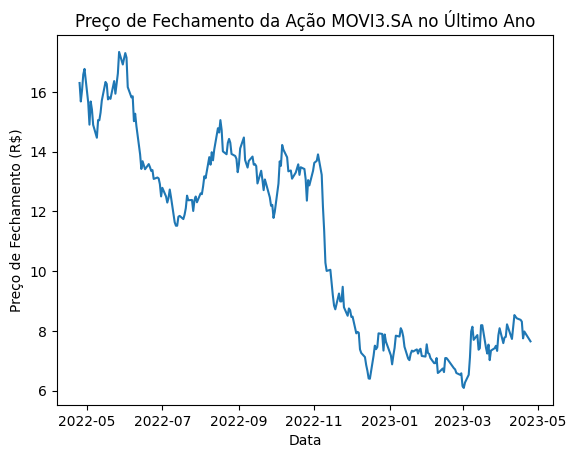

In [ ]:
resp = gerar_codigo("Plote um gráfico com o preço de fechamento da MOVI3.SA no último ano.")
# resp = gerar_codigo("Plote um gráfico com o preço de fechamento da MOVI3.SA no último ano. Usando plotly com um fundo escuro e as legendas brancas.")

executar_codigo(resposta_gpt = resp)

In [ ]:
resp = gerar_codigo("Crie uma lista com o código de três ações do mercado brasileiro setor de agronegócios. Baixe a série do preço de fechamento dos últimos 3 anos de cada uma delas e plot um gráfico de linhas com o resultado.")

In [ ]:
resp = gerar_codigo("Baixe os dados anuais de fechamento do ibovespa desde 1995, calcule o retorno de cada ano e faça um gráfico de barras por ano.")

In [ ]:
resp = gerar_codigo("Plote um gráfico com o preço de fechamento da ação das principais empresas de varejo do mercado acionário brasileiro.")

In [ ]:
# resp = gerar_codigo("Me mostre o retorno médio anual nos últimos 20 anos de se investir em uma Letra do Tesouro Americano")

In [ ]:
resp = gerar_codigo("Gere uma tabela com os preços históricos da Petrobras. Finalize o código apresentando a tabela com display(df)")
mostrar_codigo(resposta_gpt = resp)

In [ ]:
resp = gerar_codigo("Pegue os dados histórico de fechamento da VALE e do Ibovespa e coloque em tabela precos. Calcule o retorno logarítimo de ambas e coloque em uma tabela retornos. Calcule e mostre o beta da vale. Plote um gráfico com a linha de regressão entre Vale e Ibovespa.")
mostrar_codigo(resposta_gpt = resp)

========================= inicio do código gerado ========================= 



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Pegue os dados histórico de fechamento da VALE e do Ibovespa
vale = yf.Ticker('VALE3.SA')
ibov = yf.Ticker('^BVSP')

# Coloque em tabela precos
precos = pd.DataFrame({'VALE': vale.history(period='max')['Close'],
                       'IBOV': ibov.history(period='max')['Close']})

# Calcule o retorno logarítimo de ambas e coloque em uma tabela retornos
retornos = np.log(precos/precos.shift(1))

# Calcule e mostre o beta da vale
beta_vale = retornos['VALE'].cov(retornos['IBOV'])/retornos['IBOV'].var()
print('Beta da VALE:', beta_vale)

# Plote um gráfico com a linha de regressão entre Vale e Ibovespa
plt.scatter(retornos['VALE'], retornos['IBOV'])
plt.xlabel('Retorno VALE')
plt.ylabel('Retorno IBOV')

# Cálculo da linha de regressão
beta_vale, alpha_vale = np.polyfit(retornos['VALE'], retornos['IBOV'], 1)
plt.plot

In [ ]:
executar_codigo(resposta_gpt = resp)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Pegue os dados histórico de fechamento da VALE e do Ibovespa
vale = yf.Ticker('VALE3.SA')
ibov = yf.Ticker('^BVSP')

# Coloque em tabela precos
precos = pd.DataFrame({'VALE': vale.history(period='max')['Close'],
                       'IBOV': ibov.history(period='max')['Close']})

In [ ]:
# Calcule o retorno logarítimo de ambas e coloque em uma tabela retornos
retornos = np.log(precos/precos.shift(1))

In [ ]:
# Calcule e mostre o beta da vale
beta_vale = retornos['VALE'].cov(retornos['IBOV'])/retornos['IBOV'].var()
print('Beta da VALE:', beta_vale)

Beta da VALE: 0.5917932893940918


# Streamlit APP

https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/Create_streamlit_app.ipynb#scrollTo=XTGAizLhOIgC


In [ ]:
!pip install -q streamlit

## Streamlit app


In [ ]:
%%writefile app.py
import streamlit as st

x = st.slider('Select a value')
st.write(x, 'squared is', x * x)

Writing app.py


In [ ]:
# Install local tunnel
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.332s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
# Run streamlist in background
!streamlit run /content/app.py &>/content/logs.txt &

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.181s
your url is: https://eight-banks-visit-34-139-18-83.loca.lt
^C
